In [5]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

import pandas as pd

%matplotlib inline
%matplotlib widget

import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)


Exception ignored on calling ctypes callback function: <function Session.create.<locals>.print_func at 0x16951f4c0>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/clib/session.py", line 378, in print_func
    @ctp.CFUNCTYPE(ctp.c_int, ctp.c_void_p, ctp.c_char_p)

KeyboardInterrupt: 


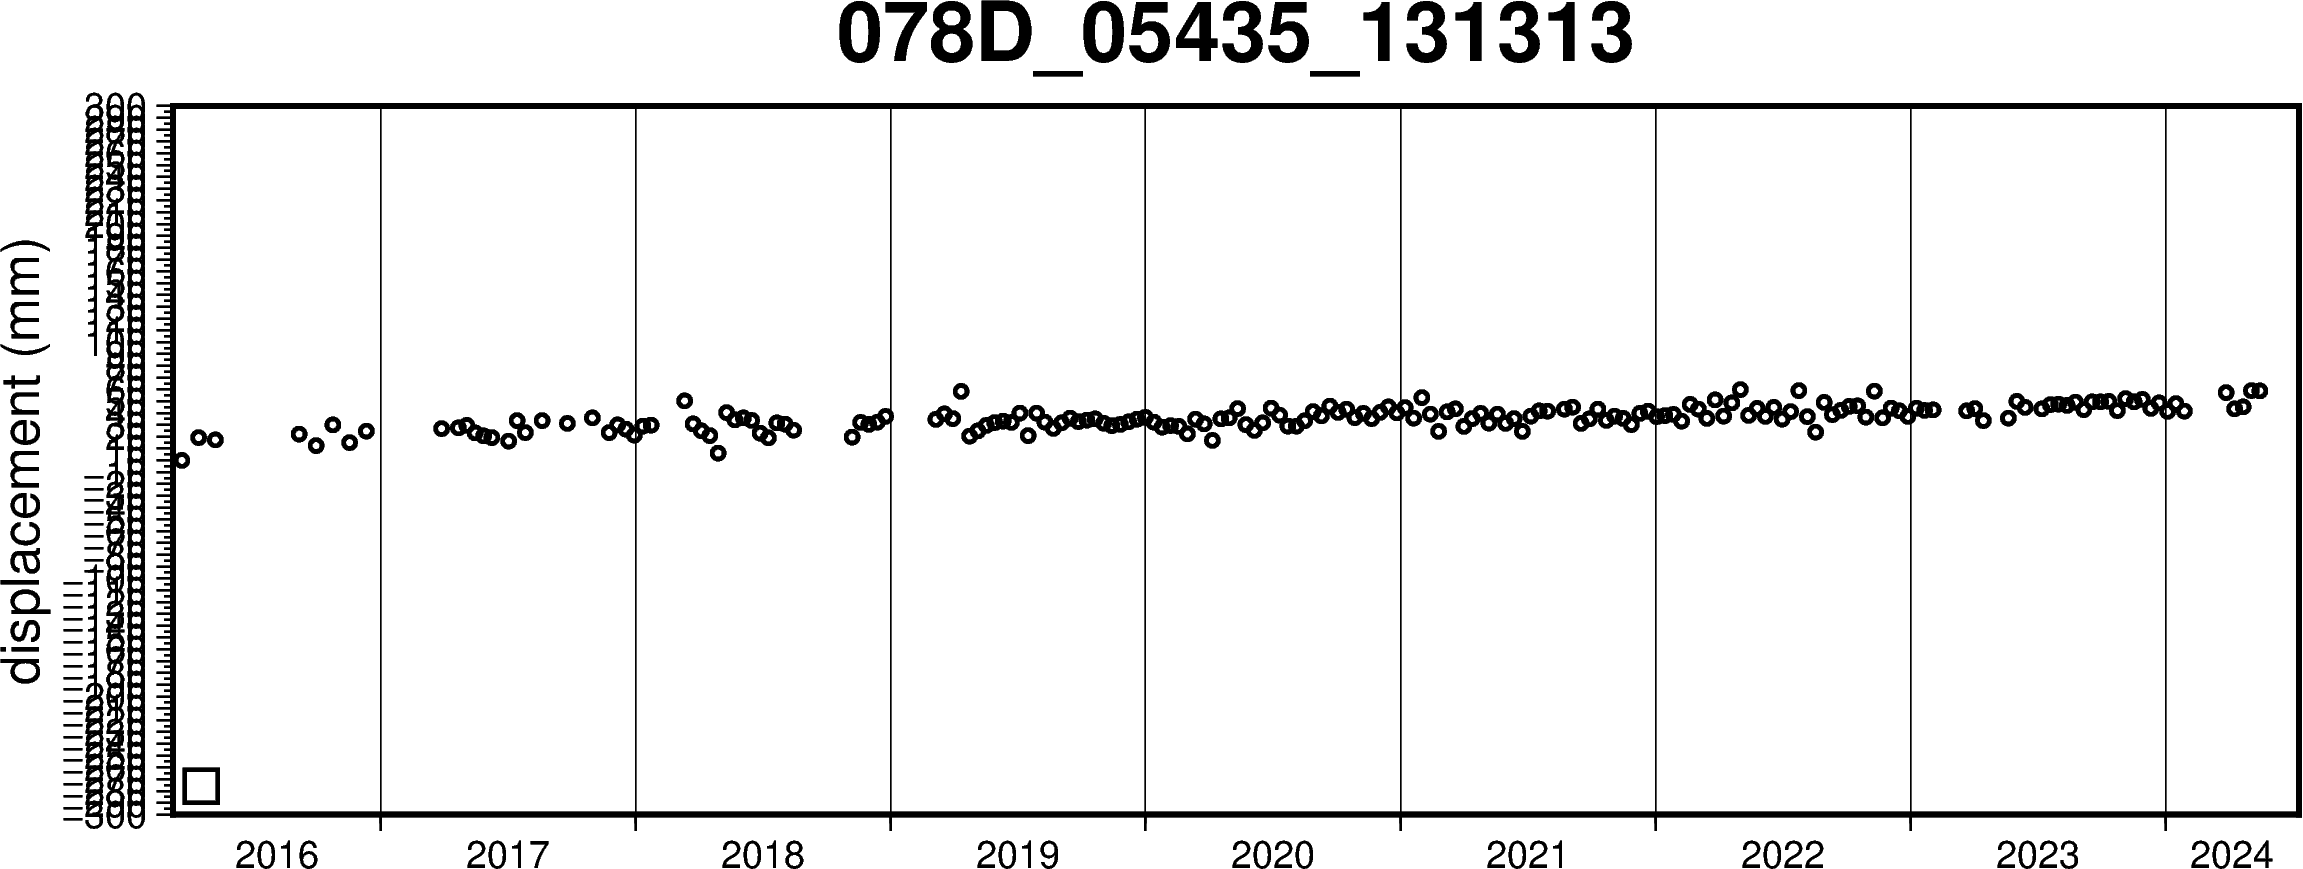

In [6]:
# time series plot
import xarray as xr
xr.set_options(keep_attrs=True)

import datetime

###########################################
InSAR_NetCDF = "078D_05435_131313_Milan.nc"
frame = "078D_05435_131313"

metadata = "bin/metadata/descending/078D_05435_131313_metadata.txt"
mindate = 2016,3,9
maxdate = 2024,7,10

lon = 70
lat = 36
###########################################
ds = xr.open_dataset("bin/"+InSAR_NetCDF)
time=ds["time"]
cum=ds["cum"]

cum_point = cum.sel(lon=lon, lat=lat, method='nearest')


fig = pygmt.Figure()

fig.plot(
    projection="X18c/6c",
    region=[datetime.date(2016,3,9), datetime.date(2024,7,10), -300, 300],
    frame=["+t "+frame, "xa1Yfg1Y", "ya10f5+ldisplacement (mm)"],
    x=time,
    y=cum_point,
    style="c0.1c",
    pen="1p"
)


fig.legend(position="JBL+jBL+o0.1c", box='+gwhite+p1p')

fig.show()

In [12]:
# time series plot
import xarray as xr
xr.set_options(keep_attrs=True)

import datetime
from datetime import datetime, date

###########################################
InSAR_NetCDF = "078D_05435_131313_Milan.nc"
frame = "078D_05435_131313"

metadata = "bin/metadata/descending/078D_05435_131313_metadata.txt"
mindate = 2016,3,9
maxdate = 2024,7,10

lon = 70
lat = 36
###########################################
ds = xr.open_dataset("bin/"+InSAR_NetCDF)
time_ds=ds["time"].values


time_arr = time_ds.astype('datetime64[ns]').astype(datetime)
time_list = [dt.date() for dt in time_arr]

print(time_list)
    
cum=ds["cum"]

cum_point = cum.sel(lon=lon, lat=lat, method='nearest')

print(time)
print(cum)
print(cum_point)

AttributeError: 'int' object has no attribute 'date'

In [13]:
###########################################
InSAR_NetCDF = "078D_05435_131313_Milan.nc"
frame = "078D_05435_131313"

metadata = "bin/metadata/descending/078D_05435_131313_metadata.txt"
mindate = 2016,3,9
maxdate = 2024,7,10

lon = 70
lat = 36
###########################################
ds = xr.open_dataset("bin/"+InSAR_NetCDF)
time = ds["time"]
print(time)

<xarray.DataArray 'time' (time: 210)> Size: 2kB
array(['2016-03-22T00:00:00.000000000', '2016-04-15T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', ..., '2024-05-03T00:00:00.000000000',
       '2024-05-15T00:00:00.000000000', '2024-05-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2016-03-22 2016-04-15 ... 2024-05-27


In [ ]:
import xarray as xr
xr.set_options(keep_attrs=True)

def pygmt_plot(grid, title, label='deformation rate (mm/year)', lims=[-25, 10],
               cmap="roma", photobg=False, plotvec=None):
    ''' Function to generate (nice) plot of given grid using pyGMT
    
    Args:
        grid (xr.DataArray): input grid to plot
        title (str):  title (note too long title will disbalance the figure)
        label (str):  label below the colour scale
        lims (list):  colour scale limits
        cmap (str):   colour scale map (try 'vik' for E-W)
        photobg (bool): will plot orthophotomap as the background (if False, DEM relief is used)
        plotvec (geopandas etc): will plot vector data to the map, using pyGMT defaults
    
    Returns:
        pygmt.figure.Figure
    '''
    try:
        grid = grid.load()
    except:
        print('error loading the input dataarray to memory')
        return False
    # try cmap 'vik' for E-W
    #
    # grid = a['U'].where(a.mask < 5) - 10
    # topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)
    topo_data = '@earth_relief_01s'  # 3 arc second global relief (SRTM3S)

    minlon, maxlon = float(np.min(grid.lon)), float(np.max(grid.lon))
    minlat, maxlat = float(np.min(grid.lat)), float(np.max(grid.lat))

    fig = pygmt.Figure()
    pygmt.config(FORMAT_GEO_MAP="ddd.xx", MAP_FRAME_TYPE="plain")
    projection = "M13c" # 'R13c' for Robinson etc.
    region = [minlon, maxlon, minlat, maxlat]
    fig.basemap(region=region, projection=projection, frame=["a0.5f0.25", '+t"{0}"'.format(title)])

    if photobg:
        import contextily as ctx
        sourcetiles = ctx.providers.Esri.WorldImagery
        fig.tilemap(
            region=region, projection=projection,
            # region=[-157.84, -157.8, 21.255, 21.285],
            # projection="M12c",
            # Set level of details (0-22)
            # Higher levels mean a zoom level closer to the Earth's
            # surface with more tiles covering a smaller
            # geographic area and thus more details and vice versa
            # Please note, not all zoom levels are always available
            zoom=14,
            # Use tiles from OpenStreetMap tile server
            source=sourcetiles
        )
        pygmt.makecpt(cmap=cmap, series=lims, background=True)
        fig.grdview(grid=grid, cmap=True, projection=projection, surftype='c', transparency=40)
    else:
        pygmt.makecpt(cmap="gray", series=[-8000, 8000, 1000], continuous=True)
        fig.grdimage(
            grid=topo_data,
            cmap=True,
            region=[minlon, maxlon, minlat, maxlat],
            projection=projection,
            shading=True,
            frame=True
        )
        pygmt.makecpt(cmap=cmap, series=lims, background=True)
        fig.grdimage(grid=grid, cmap=True, projection=projection, frame=True, transparency=40)
    
    fig.coast(shorelines=True, projection=projection)
    if type(plotvec) != type(None):
        fig.plot(plotvec, projection=projection, region=region)
    fig.colorbar(frame='a2f1+l"{}"'.format(label))
    # fig.show()
    return fig

InSAR_NetCDF = "078D_05435_131313_Milan.nc"
a=xr.open_dataset("bin/"+InSAR_NetCDF); vel=a["vel"]; pygmt_plot(vel, title="vel", lims=[-4,4])

In [ ]:
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66.8 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=72.6 # upper right corner longitude
urcrnrlat=37.6 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

meca_trans = 22 # meca transparency
meca_scale = "0.4c" # meca scale

frame = "078D_05435_131313"
# InSAR_tif ="071A_05440_131313_2.vel.filt.mskd.geo.tif"
InSAR_NetCDF = "078D_05435_131313_Milan.nc"
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

def plot_vel_esd_gmt(selected_frame_esds, frameta, mindate, maxdate, level1, level2=None, showitrf=True):
    frame = frameta['frame'].values[0]
    #
    fig = pygmt.Figure()
    #
    fig.basemap(
        projection="X18c/6c",
        region=[mindate, maxdate, -300, 300], #datetime.date(2010, 1, 1), datetime.date(2020, 6, 1), 0, 10],
        #frame=["WSen", "af"],
        #frame=["WSne", "xaf", "yaf+l'daz [mm]'"]
        frame=["+t "+frame, "xa1Yfg1Y", "yafg100+ldaz [mm]"]
    )
    #
    if level2:
        fig = figpart_var(level1, selected_frame_esds, frameta, fig, additrf = (True & showitrf), plotstd = False)
        fig = figpart_var(level2, selected_frame_esds, frameta, fig, additrf = (False & showitrf), plotstd = True)
    else:
        fig = figpart_var(level1, selected_frame_esds, frameta, fig, additrf = (True & showitrf), plotstd = True)
    #
    #print('legend')
    fig.basemap(frame=True) #["WSen", "af"])
    fig.legend(position="JBL+jBL+o0.1c", box='+gwhite+p1p')
    #fig.show(dpi=120)
    return fig
